In [7]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
"""Close, High, Low, Open, Volume"""
enddate = dt.datetime.now()
startdate = enddate - dt.timedelta(days = 365*5)
enddate, startdate
stocks = ['AVGO', 'NVDA', 'AMD']
df = yf.download(stocks, start = startdate, end = enddate)
df.head() 

[*********************100%***********************]  3 of 3 completed


Price           Close                             High                        \
Ticker            AMD       AVGO       NVDA        AMD       AVGO       NVDA   
Date                                                                           
2021-01-19  89.449997  41.316261  12.988725  89.580002  41.336056  13.057281   
2021-01-20  88.750000  41.551071  13.328271  90.779999  41.902817  13.392839   
2021-01-21  91.529999  41.995468  13.828612  92.070000  42.233864  13.959993   
2021-01-22  92.790001  41.833546  13.674046  95.949997  42.061148  13.802934   
2021-01-25  94.129997  41.812866  13.614963  95.739998  42.281562  13.789721   

Price             Low                             Open                        \
Ticker            AMD       AVGO       NVDA        AMD       AVGO       NVDA   
Date                                                                           
2021-01-19  87.239998  40.327594  12.807982  89.559998  40.327594  12.979749   
2021-01-20  88.599998  40.932141  13.020137  90.550003  41.338764  13.074983   
2021-01-21  88.430000  41.417922  13.215835  89.339996  41.571752  13.380871   
2021-01-22  91.879997  41.596049  13.589035  94.419998  41.716599  13.701469   
2021-01-25  91.400002  41.029309  13.199381  94.139999  42.241980  13.743102   

Price         Volume                       
Ticker           AMD      AVGO       NVDA  
Date                                       
2021-01-19  45115100  18819000  226188000  
2021-01-20  35185800  14710000  258572000  
2021-01-21  54221900  15749000  337780000  
2021-01-22  71294700  16248000  246820000  
2021-01-25  55086900  14692000  251112000

In [3]:
"""Adjusted Close"""
df = yf.download(stocks, start=startdate, end=enddate, auto_adjust=False) #-------- Force yfinance to only show Adj Close
adj_close_prices = df['Adj Close']
adj_close_prices.head()

[*********************100%***********************]  3 of 3 completed


Ticker,AMD,AVGO,NVDA
Date,,,
2021-01-19,89.449997,41.316265,12.988725
2021-01-20,88.750000,41.551067,13.328268
2021-01-21,91.529999,41.995472,13.828610
2021-01-22,92.790001,41.833546,13.674045
2021-01-25,94.129997,41.812855,13.614964


In [4]:
"""Calculate Daily & Cumulative Returns Visualization"""
log_returns = np.log(adj_close_prices/adj_close_prices.shift(1))
log_returns.head()

Ticker,AMD,AVGO,NVDA
Date,,,
2021-01-19,NaN,NaN,NaN
2021-01-20,-0.007856,0.005667,0.025806
2021-01-21,0.030843,0.010639,0.036852
2021-01-22,0.013672,-0.003863,-0.011240
2021-01-25,0.014338,-0.000495,-0.004330


<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

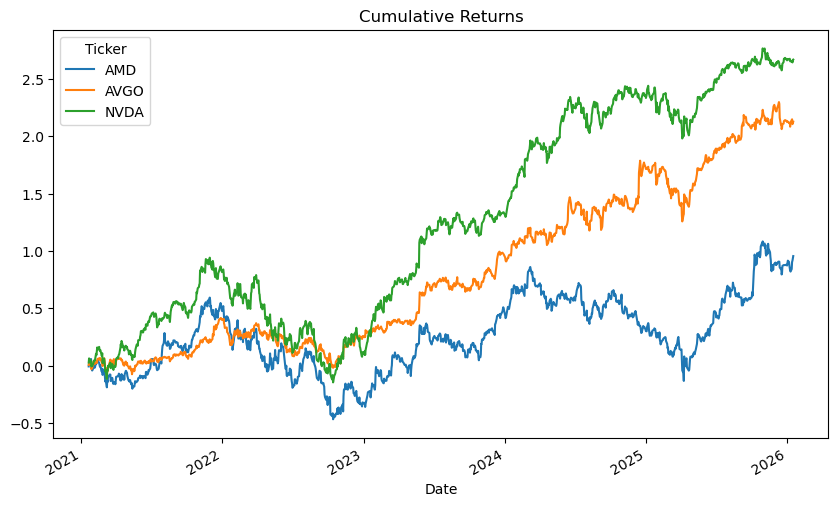

In [5]:
cumulative_log_returns = log_returns.cumsum()
cumulative_log_returns.plot(title="Cumulative Returns", figsize=(10, 6))